# Business Problem

There's no need to buy new cars anymore! Second-hand vehicles are becoming more and more popular, with buyers getting great value for their money. But as opposed to showrooms or dealerships where you can walk away without much thought involved in the decision-making process, these second-hand car deals require careful consideration.

Before buying or selling an old car, knowing its value is essential. Unfortunately, dealers or owners can often ask for the wrong amount, hoping to gain an ill-gotten profit. However, if you know how to find the valuation, they won't be able to fool you.

This process can be made more accessible, with online tools that can help you calculate a car's value in minutes. All you need is the make and model of the vehicle and some basic information about its condition.

# Business objective and constraints
* Interpretablity is partially important.
* No low latency requirement.
* Errors- deviation from the actual price should not be more than 50k to 1Lakh rupees.

# Mapping to an ML problem

## Data aquisation from kaggle

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#! pip install -q kaggle

In [3]:
#! mkdir ~/.kaggle

In [4]:
#! cp /content/drive/MyDrive/DS_DL_ML_AI_project/kaggle.json ~/.kaggle/

In [5]:
#! chmod 600 ~/.kaggle/kaggle.json

In [6]:
#! kaggle datasets download -d nehalbirla/vehicle-dataset-from-cardekho

In [7]:
#! mkdir train

In [8]:
# All the data in the ZIP will be unzipped in train folder.
#! unzip /content/vehicle-dataset-from-cardekho.zip -d train

## Data Files overview
There are 4 files in the kaggle API out of which we will be using:
* Car details v3.csv file since it has just enough features required for modelling and highest number of rows compared to other files.
* Data contains 13 columns:
      name: Name of the car barand and model.
      year: Year of the car when it was bought.
      selling_price: Price at which the car is being sold.
      km_driven: Number of Kilometres the car is driven from the date of purchase.
      fuel: Fuel type of car (petrol / diesel / CNG / LPG / electric)
      seller_type: Tells if a Seller is Individual or a Dealer
      transmission: Gear transmission of the car (Automatic/Manual)
      owner: Number of previous owners of the car.
      mileage: kmpl of the car.
      engine: cc of the engine.
      max_power: max power output of the engine.
      torque: max torque output of the engine.
      seats: Max seats in a car.


## ML Problem

* Regression problem.
* Need data featurizarion of continuous numerical feature into categories such as engine capacity.
* Encode categorical variables.

## Performance Metric

* Mean Absolute Error(MAE)
* Root Mean Squared Error(RMSE)
* Root Mean Squared Log Error(RMSLE)
* R Squared (R2)
* Adjusted R Squared

##Train Test Split

* Random split as there is no time stamps in the data and this problem doesn't depend completely on time unless affected by external factors.

# Data Cleaning, Prepration and Feature engineering(basic)

In [24]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [27]:
carsData = pd.read_csv('train/Car details v3.csv') # Read CSV file
print("Shape of the data: ",carsData.shape) # shape of the dataset
carsData.head() # View first 5 rows by default

Shape of the data:  (8128, 13)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [28]:
# Check Dtype of the features
carsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


Numerical features: year, selling_price , km_driven have int Dtype hence no non standard missing values.

mileage, engine, max_power, torque are numerical features but has UNIT hence displayed has object Dtype.

preprocess to move units into new column for future analysis and ignore torque feature as it will be dropped since its not usefull from domain knowledge and data is complex.

In [29]:
# Split numerical value and unit and create new column.
carsData[['mileage','mileage_unit']] = carsData['mileage'].str.split(" ", expand=True)
carsData[['engine','engine_unit']] = carsData['engine'].str.split(" ", expand=True)
carsData[['max_power','max_power_unit']] = carsData['max_power'].str.split(" ", expand=True)
carsData.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_unit,engine_unit,max_power_unit
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0,kmpl,CC,bhp
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,kmpl,CC,bhp
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0,kmpl,CC,bhp
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0,kmpl,CC,bhp
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0,kmpl,CC,bhp


In [31]:
# we will consider only 2 things in car name i.e make and model rest is jumbled.
# make -> car brand
# model -> car model
carsData[['make','model']] = carsData['name'].str.split(" ", expand=True).iloc[:,:2]
carsData.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_unit,engine_unit,max_power_unit,make,model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0,kmpl,CC,bhp,Maruti,Swift
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,kmpl,CC,bhp,Skoda,Rapid
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0,kmpl,CC,bhp,Honda,City
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0,kmpl,CC,bhp,Hyundai,i20
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0,kmpl,CC,bhp,Maruti,Swift


In [32]:
# Creating car age column since price decrease as age increase
carsData['age'] = 2023 - carsData['year']
carsData.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_unit,engine_unit,max_power_unit,make,model,age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0,kmpl,CC,bhp,Maruti,Swift,9
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,kmpl,CC,bhp,Skoda,Rapid,9
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0,kmpl,CC,bhp,Honda,City,17
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0,kmpl,CC,bhp,Hyundai,i20,13
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0,kmpl,CC,bhp,Maruti,Swift,16


In [33]:
# Drop the irrelevant columns before analysis

# Drop parent feature from which new features are derived to avoid multi colinearity.
# Drop Torque since it has multiple values combination with different scale and will be colinear with engine capicity and power.

carsData.drop(['name','year','torque'], axis = 1, inplace = True)
carsData.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,mileage_unit,engine_unit,max_power_unit,make,model,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0,kmpl,CC,bhp,Maruti,Swift,9
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,kmpl,CC,bhp,Skoda,Rapid,9
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0,kmpl,CC,bhp,Honda,City,17
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0,kmpl,CC,bhp,Hyundai,i20,13
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0,kmpl,CC,bhp,Maruti,Swift,16


In [34]:
# Check for non standard missing values eg: ?, <>, -- etc. and convert them to NaN.

# For non standard missing values in categorical features -> check using unique

catFeatList = ['fuel','seller_type','transmission','owner','mileage_unit','engine_unit','max_power_unit','make','model']

for feature in catFeatList:
  print('Unique values of {}: {}\n'.format(feature,carsData[feature].unique()))

Unique values of fuel: ['Diesel' 'Petrol' 'LPG' 'CNG']

Unique values of seller_type: ['Individual' 'Dealer' 'Trustmark Dealer']

Unique values of transmission: ['Manual' 'Automatic']

Unique values of owner: ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']

Unique values of mileage_unit: ['kmpl' 'km/kg' nan]

Unique values of engine_unit: ['CC' nan]

Unique values of max_power_unit: ['bhp' nan None]

Unique values of make: ['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']

Unique values of model: ['Swift' 'Rapid' 'City' 'i20' 'Xcent' 'Wagon' '800' 'Etios' 'Figo'
 'Duster' 'Zen' 'KUV' 'Ertiga' 'Alto' 'Verito' 'WR-V' 'SX4' 'Tigor'
 'Baleno' 'Enjoy' 'Omni' 'Vitara' 'Palio' 'Verna' 'GO' 'Safari' 'Compass'
 'Fortuner' 

No non standard missing values in categorical features.

In [35]:
# Detecting non numbers in numerical features and converting them into Nan

numFeatList = ['mileage','engine','max_power']
for features in numFeatList:
    cnt=0 # row_label
    for row in carsData[features]:
        try:
            int(float(row))
        except:
            carsData.loc[cnt, features]=np.nan # Assigning nan for non numeric value in numeric feature
        cnt+=1

In [36]:
# Summarizing Missing Values

carsData.isnull().sum()

selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage           221
engine            221
max_power         216
seats             221
mileage_unit      221
engine_unit       221
max_power_unit    221
make                0
model               0
age                 0
dtype: int64

      There are 200+ missing values in milege, engine, max_power, torque, seats.

In [37]:
# Total % of missing records across whole dataset.

totalMissRecord = round((carsData[carsData.isnull().any(axis=1)].shape[0]* 100 / len(carsData)),2)
print("Total percentage of missing records: {}%".format(totalMissRecord))

Total percentage of missing records: 2.73%


Since missing values are less than 5%  and more the 1 value is missing in the same row we will drop them.

In [38]:
# Drop missing values
print("Shape of Dataset before dropping missing values:",carsData.shape)
carsData.dropna(axis=0, inplace=True)
print("Shape of Dataset after dropping missing values:",carsData.shape)

Shape of Dataset before dropping missing values: (8128, 16)
Shape of Dataset after dropping missing values: (7906, 16)


In [39]:
# Overview of dtypes of features
carsData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   selling_price   7906 non-null   int64  
 1   km_driven       7906 non-null   int64  
 2   fuel            7906 non-null   object 
 3   seller_type     7906 non-null   object 
 4   transmission    7906 non-null   object 
 5   owner           7906 non-null   object 
 6   mileage         7906 non-null   object 
 7   engine          7906 non-null   object 
 8   max_power       7906 non-null   object 
 9   seats           7906 non-null   float64
 10  mileage_unit    7906 non-null   object 
 11  engine_unit     7906 non-null   object 
 12  max_power_unit  7906 non-null   object 
 13  make            7906 non-null   object 
 14  model           7906 non-null   object 
 15  age             7906 non-null   int64  
dtypes: float64(1), int64(3), object(12)
memory usage: 1.0+ MB


Few numerical features are still in object Dtype post preprocessing, convert them to int.

In [40]:
carsData = carsData.astype({'mileage':float, 'engine':int, 'max_power':float,'seats':int })
carsData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   selling_price   7906 non-null   int64  
 1   km_driven       7906 non-null   int64  
 2   fuel            7906 non-null   object 
 3   seller_type     7906 non-null   object 
 4   transmission    7906 non-null   object 
 5   owner           7906 non-null   object 
 6   mileage         7906 non-null   float64
 7   engine          7906 non-null   int32  
 8   max_power       7906 non-null   float64
 9   seats           7906 non-null   int32  
 10  mileage_unit    7906 non-null   object 
 11  engine_unit     7906 non-null   object 
 12  max_power_unit  7906 non-null   object 
 13  make            7906 non-null   object 
 14  model           7906 non-null   object 
 15  age             7906 non-null   int64  
dtypes: float64(2), int32(2), int64(3), object(9)
memory usage: 988.2+ KB


Check new Unit value features for different unit measurement

In [41]:
catFeatList = ['mileage_unit','engine_unit','max_power_unit']

for feature in catFeatList:
  print('Unique values of {}: {}\n'.format(feature,carsData[feature].unique()))

Unique values of mileage_unit: ['kmpl' 'km/kg']

Unique values of engine_unit: ['CC']

Unique values of max_power_unit: ['bhp']



**Observation**
* Engine capacity and power has one type of unit measurement.
* Mileage has 2 different units, if possible should convert km/kg to kmpl.

In [42]:
# CNG-equipped car offers around one-and-a-half times the fuel efficiency in CNG mode than in petrol,
# So we will multiply CNG mileage by 1.5 times to match the scale.

carsData.loc[carsData['mileage_unit']=='km/kg','mileage'] = carsData.loc[carsData['mileage_unit']=='km/kg','mileage']*1.5

In [43]:
# Convert Selling Price & KM driven -> in Lakhs 

carsData['selling_price'] = round((carsData['selling_price']/100000),1)
carsData['km_driven'] = round((carsData['km_driven']/100000),2)
carsData['engine'] = round((carsData['engine']/1000),1)
carsData.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,mileage_unit,engine_unit,max_power_unit,make,model,age
0,4.5,1.46,Diesel,Individual,Manual,First Owner,23.40,1.2,74.00,5,kmpl,CC,bhp,Maruti,Swift,9
1,3.7,1.20,Diesel,Individual,Manual,Second Owner,21.14,1.5,103.52,5,kmpl,CC,bhp,Skoda,Rapid,9
2,1.6,1.40,Petrol,Individual,Manual,Third Owner,17.70,1.5,78.00,5,kmpl,CC,bhp,Honda,City,17
3,2.2,1.27,Diesel,Individual,Manual,First Owner,23.00,1.4,90.00,5,kmpl,CC,bhp,Hyundai,i20,13
4,1.3,1.20,Petrol,Individual,Manual,First Owner,16.10,1.3,88.20,5,kmpl,CC,bhp,Maruti,Swift,16


In [44]:
# Remove Unit column as they are not useful now.

carsData.drop(['mileage_unit',	'engine_unit','max_power_unit'], axis=1, inplace=True)
carsData.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,make,model,age
0,4.5,1.46,Diesel,Individual,Manual,First Owner,23.40,1.2,74.00,5,Maruti,Swift,9
1,3.7,1.20,Diesel,Individual,Manual,Second Owner,21.14,1.5,103.52,5,Skoda,Rapid,9
2,1.6,1.40,Petrol,Individual,Manual,Third Owner,17.70,1.5,78.00,5,Honda,City,17
3,2.2,1.27,Diesel,Individual,Manual,First Owner,23.00,1.4,90.00,5,Hyundai,i20,13
4,1.3,1.20,Petrol,Individual,Manual,First Owner,16.10,1.3,88.20,5,Maruti,Swift,16


In [45]:
# Handling missig or unappropriate values like 0 for numerical features.
(carsData['mileage'] == 0).sum()

numFeatList = ['mileage','engine','max_power','seats','km_driven','age']
for i in numFeatList:
  print("Total records with ZERO value in {}: {}".format(i,(carsData[i] == 0).sum()))

Total records with ZERO value in mileage: 17
Total records with ZERO value in engine: 0
Total records with ZERO value in max_power: 0
Total records with ZERO value in seats: 0
Total records with ZERO value in km_driven: 1
Total records with ZERO value in age: 0


In [46]:
# Handling missig values like 0 for mileage

for indx in carsData.loc[carsData['mileage'] == 0].index:
    carModel,carFuel,carEngine = carsData.loc[indx,['model','fuel','engine']]
    
    # Fine the median mileage of model and fue combination of specific car.
    medianMileage = carsData.loc[(carsData['model']==carModel) & (carsData['fuel']==carFuel),'mileage'].median()

    # We might have new car with no previous record we will remplace milege of similar car with diesel and fuel
    if medianMileage == 0:
        medianMileage = carsData.loc[(carsData['fuel'] ==carFuel) & (carsData['engine']==carEngine),'mileage'].median()

    # Assigning the median value:
    carsData.loc[indx,'mileage'] = medianMileage

In [47]:
# Handling missig values like 0 for km_driven.
# Using age to impute 0 km because cars with more age tend to be driven more.

for indx in carsData.loc[carsData['km_driven'] == 0].index:
    carAge = carsData.loc[indx,'age']
    
    # Fine the median km of the car by using age.
    mediankm = carsData.loc[carsData['age']==carAge,'km_driven'].median()

    # We might have car with not exact age, so we will take a range of age
    if mediankm == 0:
        mediankm = carsData.loc[(carsData['age'] > carAge-5) & (carsData['age'] < carAge+5),'km_driven'].median()
    elif mediankm == 0:
        mediankm = round((carsData['km_driven'].mean()),2) # Mean coz usually cars in this category tend to be run max

    # Assigning the median value:
    carsData.loc[indx,'km_driven'] = mediankm

In [48]:
print('Total duplicate rows:',carsData.duplicated().sum())

Total duplicate rows: 1221


In [49]:
# Check for duplicate records and drop them.
print('Total duplicate rows:',carsData.duplicated().sum())
carsData.drop_duplicates(inplace=True)
print("Shape of the data post removing duplicates: ",carsData.shape)

Total duplicate rows: 1221
Shape of the data post removing duplicates:  (6685, 13)


# Exploratory data analysis (EDA)

## Basic Statistics

In [50]:
# numerical overview of features
carsData.describe()

,selling_price,km_driven,mileage,engine,max_power,seats,age
count,6685.000000,6685.000000,6685.000000,6685.000000,6685.000000,6685.000000,6685.000000
mean,5.267345,0.734539,19.641701,1.429693,87.814319,5.433957,9.394764
std,5.245731,0.587326,4.281920,0.498270,31.739179,0.984172,3.901526
min,0.300000,0.010000,9.000000,0.600000,32.800000,2.000000,3.000000
25%,2.500000,0.380000,16.800000,1.200000,68.000000,5.000000,6.000000
50%,4.200000,0.690000,19.600000,1.200000,81.830000,5.000000,9.000000
75%,6.500000,1.000000,22.540000,1.500000,100.000000,5.000000,12.000000
max,100.000000,23.600000,50.160000,3.600000,400.000000,14.000000,29.000000


## Data Visualization
* Visualizing unique features and its observation

### Univariant analysis

#### Make(brand name)

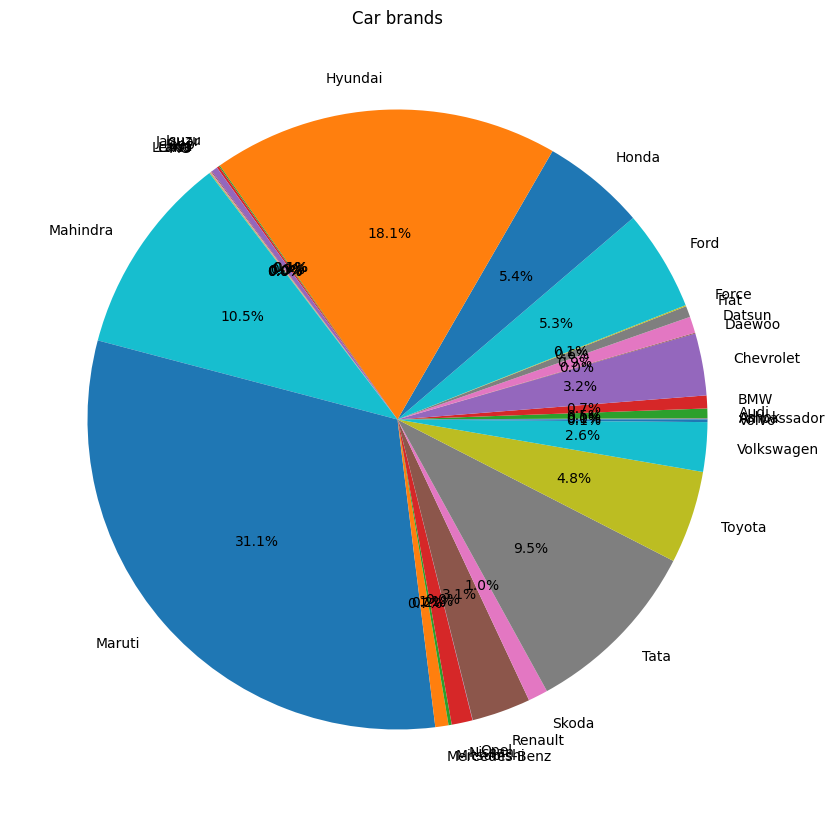

In [51]:
# Pie chart to observe the total percentage share of each brand in the dataset
carsMakeCounts = np.unique(carsData['make'], return_counts=True)
plt.figure(figsize=(10,20))
plt.pie(carsMakeCounts[1], labels = carsMakeCounts[0], autopct='%1.1f%%')
plt.title("Car brands")
plt.show()

**Observation**
* About 75 % of cars brands are Maruti, Hyundai, Mahindra, Tata, Honda, Toyota, Ford.
* Out of which 30% share is with Maruti
* Rate of depreciation affects differently for different country car brands.

#### Fuel

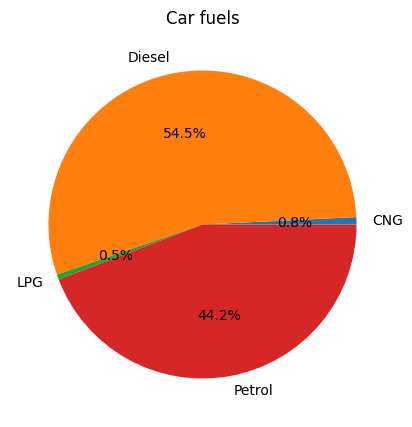

In [52]:
carsFuelCounts = np.unique(carsData['fuel'], return_counts=True)
plt.figure(figsize=(5,5))
plt.pie(carsFuelCounts[1], labels = carsFuelCounts[0], autopct='%1.1f%%')
plt.title("Car fuels")
plt.show()

**Observation**
* Diesel and Petrol make almost 99% of the used cars in the data.

#### Seller type

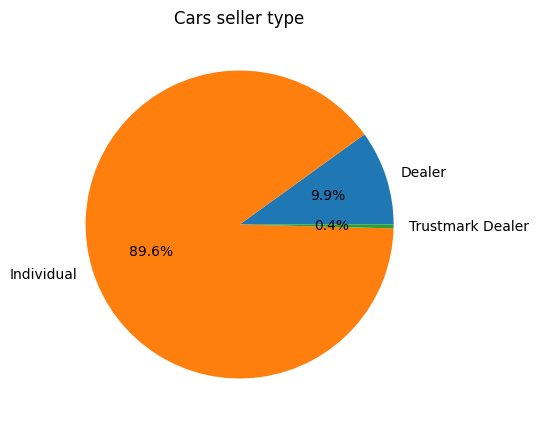

In [53]:
carsSellerCounts = np.unique(carsData['seller_type'], return_counts=True)
plt.figure(figsize=(5,5))
plt.pie(carsSellerCounts[1], labels = carsSellerCounts[0], autopct='%1.1f%%')
plt.title("Cars seller type")
plt.show()

**Observation**
* Most of the cars are sold by Individual.
* Cars sold by dealer will have dealer commission included. 

#### Transmission

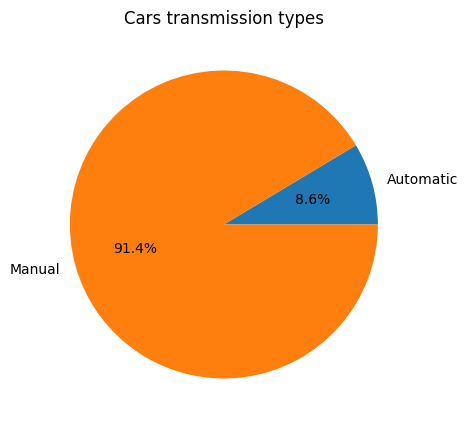

In [54]:
carsTransmissionCounts = np.unique(carsData['transmission'], return_counts=True)
plt.figure(figsize=(5,5))
plt.pie(carsTransmissionCounts[1], labels = carsTransmissionCounts[0], autopct='%1.1f%%')
plt.title("Cars transmission types")
plt.show()

**Observation**
* Majority of the cars have manual transmission.
* Manual transmission are known to be relaible than automatic and can affect selling price.
* The cost of owining a automatic in the first place is higher than manual.

#### Owner

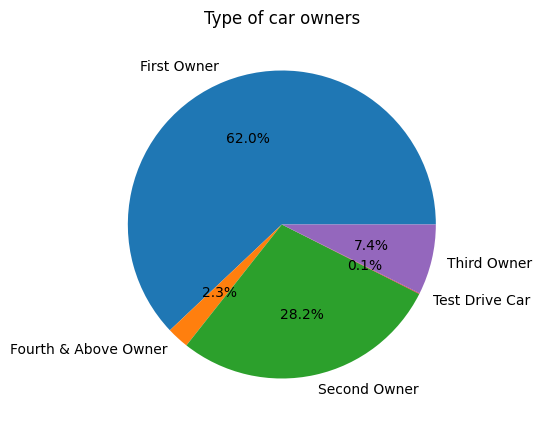

In [55]:
carsownerCounts = np.unique(carsData['owner'], return_counts=True)
plt.figure(figsize=(5,5))
plt.pie(carsownerCounts[1], labels = carsownerCounts[0], autopct='%1.1f%%')
plt.title("Type of car owners")
plt.show()

**Observation**
* Majority of the cars are sold by first owner and then followed by second owner.
* Major depreciation will be observed first and second owner's car.

#### Seats

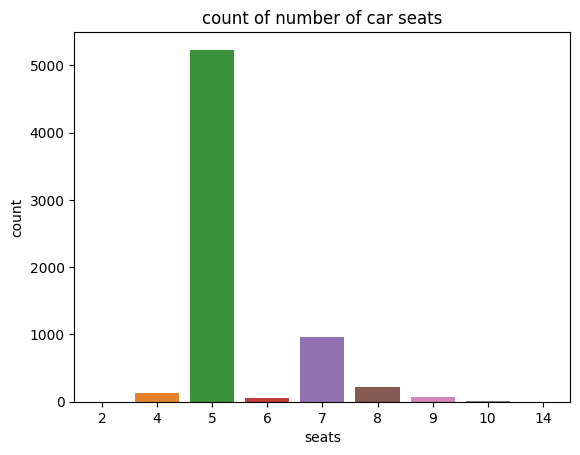

In [56]:
sns.countplot(x=carsData['seats'])
plt.title("count of number of car seats")
plt.show()

**Observation**
* Majority of the cars in the data are 5 seater followed by 7 seater.
* very few 10 and 14 seater cars.
* need to check bivarriant analysis with respect to selling price to check how does number of seats affect.
* cars with 2 seats are noted need to analyze ans handel if incorrect data.

In [57]:
# Anylizing records for cars seats > 9 seats
noOfSeats = 9
print("Cars with more than {} seats : {}".format(noOfSeats,carsData[carsData['seats']>noOfSeats]['model'].unique()))

Cars with more than 9 seats : ['Sumo' 'Tavera' 'Winger' 'Qualis' 'Spacio']


In [58]:
# Editing cars with 2 seats and replacing with the mode of the same car.

for indx in carsData[carsData['seats'] == 2].index:
  carName = carsData.loc[indx,'model']
  modeSeats = carsData.loc[carsData['model'] == carName,'seats'].mode()[0]

  if modeSeats == 0:
      modeSeats = 5

  carsData.loc[indx,'seats'] = modeSeats

#### Model

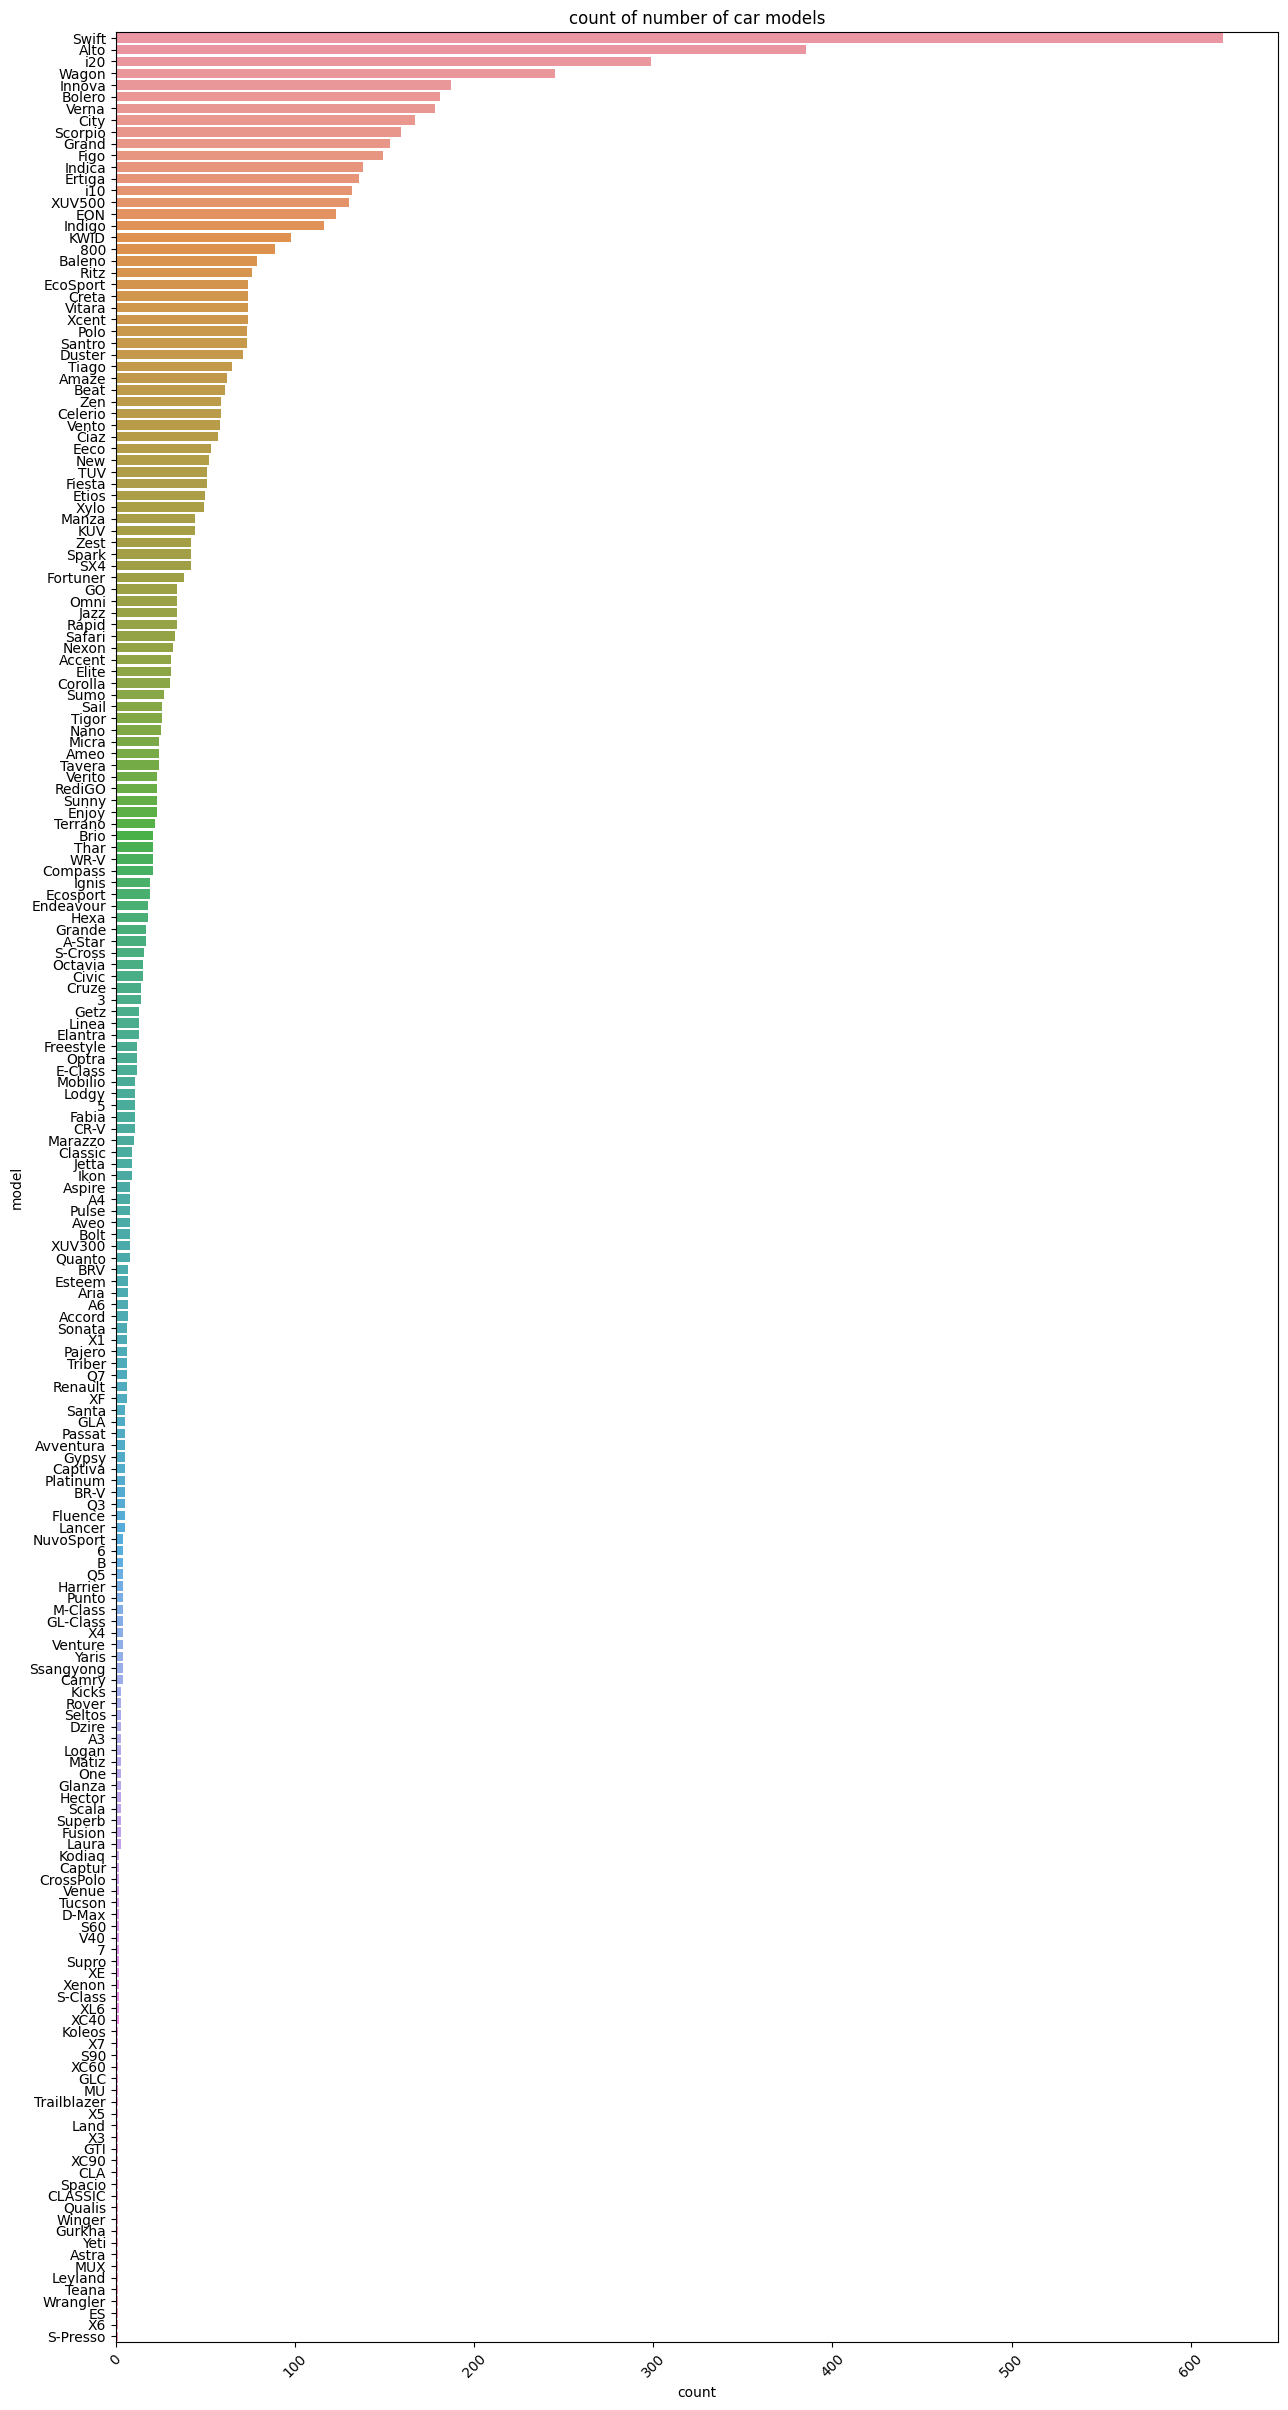

In [59]:
plt.figure(figsize=(15,30))
sns.countplot(y='model', data = carsData, order = carsData['model'].value_counts().index)
plt.title("count of number of car models")
plt.xticks(rotation = 45)
plt.show()

In [60]:
modelCount = carsData.model.value_counts()
modelCount[modelCount<3].index.unique()

Index(['Kodiaq', 'Captur', 'CrossPolo', 'Venue', 'Tucson', 'D-Max', 'S60',
       'V40', '7', 'Supro', 'XE', 'Xenon', 'S-Class', 'XL6', 'XC40', 'Koleos',
       'X7', 'S90', 'XC60', 'GLC', 'MU', 'Trailblazer', 'X5', 'Land', 'X3',
       'GTI', 'XC90', 'CLA', 'Spacio', 'CLASSIC', 'Qualis', 'Winger', 'Gurkha',
       'Yeti', 'Astra', 'MUX', 'Leyland', 'Teana', 'Wrangler', 'ES', 'X6',
       'S-Presso'],
      dtype='object')

**Observation**
* Too many model categories to one hot encode, should find alternate way for encoding or drop the feaure.
* count of models are very less for majority of the models.
* Club these cars counts as Indian, German etc in feature engineering.

#### Selling Price

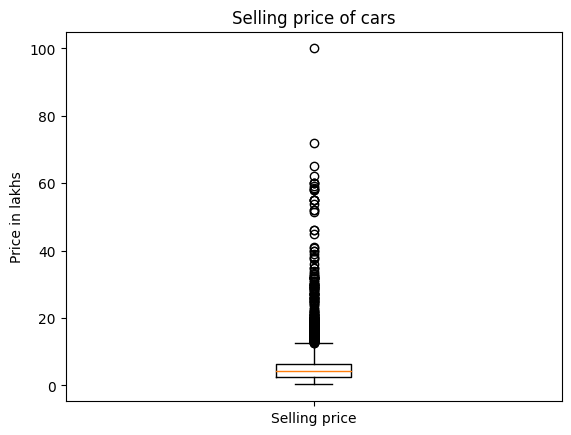

In [61]:
plt.boxplot(x=carsData['selling_price'].values, labels=['Selling price'])
plt.title("Selling price of cars")
plt.ylabel("Price in lakhs")
plt.show()

In [62]:
highSellingCars = carsData.loc[carsData['selling_price'] > 30,'make'].unique()
print("Cars selling price greater than 30 lakhs:",highSellingCars)

Cars selling price greater than 30 lakhs: ['Audi' 'Lexus' 'Jaguar' 'Jeep' 'Land' 'Mercedes-Benz' 'BMW' 'Volvo'
 'Ford' 'Toyota' 'Skoda']


**Observation**
* Selling price is a dependent fearure.
* Most of the car value lies below 20 lakhs.
* Potential outliers observed, positive skewed distribution
* All outliers are valid values.

#### Mileage

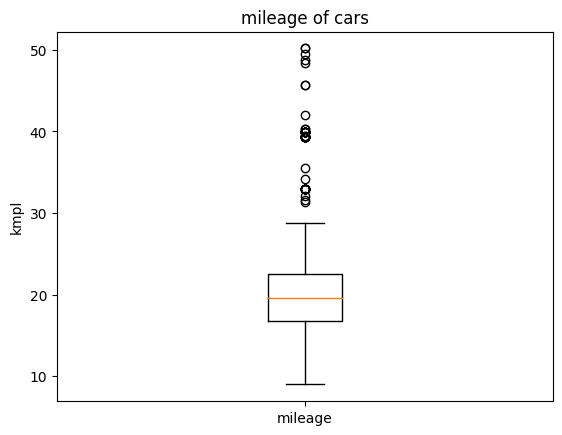

In [63]:
plt.boxplot(x=carsData['mileage'].values,labels=['mileage'])
plt.title("mileage of cars")
plt.ylabel("kmpl")
plt.show()

In [64]:
ZeroMileageCars = carsData.loc[carsData['mileage'] == 0,'make'].unique()
print("Cars with zero mileage:",ZeroMileageCars)

Cars with zero mileage: []


**Observation**
* 95% of the cars have milege between 10 kmpl and 30 kmpl.
* Median milage is around 20 kmpl.
* cars with zero mileage observed and its not possible hence need to treat them.

#### km driven

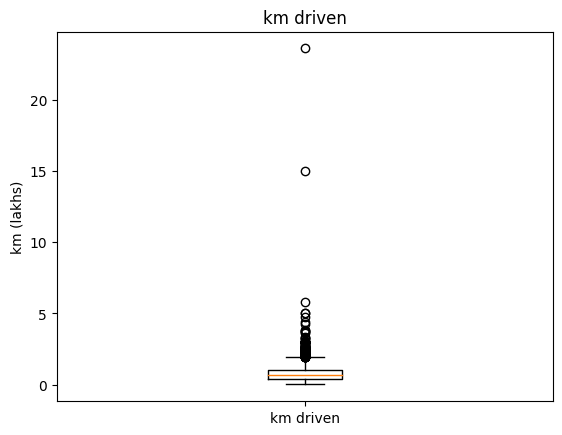

In [65]:
plt.boxplot(x=carsData['km_driven'].values,labels=['km driven'])
plt.title("km driven")
plt.ylabel("km (lakhs)")
plt.show()

In [66]:
highDrivenCars = carsData.loc[carsData['km_driven'] > 3,'make'].unique() # i.e greater then 3 lakh km
print("Cars with high km driven:",highDrivenCars)

Cars with high km driven: ['Maruti' 'Toyota' 'Mahindra' 'Hyundai']


**Observation**
* Positive skewed data having large outliers.
* 95% of cars have run below 2.5 lakh km.
* cars greater than 3 lakh is possible but cars more than 15 laks isnt possible, these are outliers needs to be corrected.

In [67]:
# Handling km driven outlier
carsData.loc[carsData['km_driven'] > 6] # i.e 6lakh km

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,make,model,age
1810,5.0,15.0,Diesel,Individual,Manual,First Owner,15.1,2.2,140.00,7,Mahindra,XUV500,11
3486,5.5,23.6,Petrol,Individual,Manual,Second Owner,18.6,1.2,81.83,5,Hyundai,i20,16


* Impossible for very high km driven in a car hence assuming an extra zero, and correctig the values.

In [68]:
carsData.loc[carsData['km_driven'] > 6,'km_driven'] = carsData.loc[carsData['km_driven'] > 6,'km_driven']/10

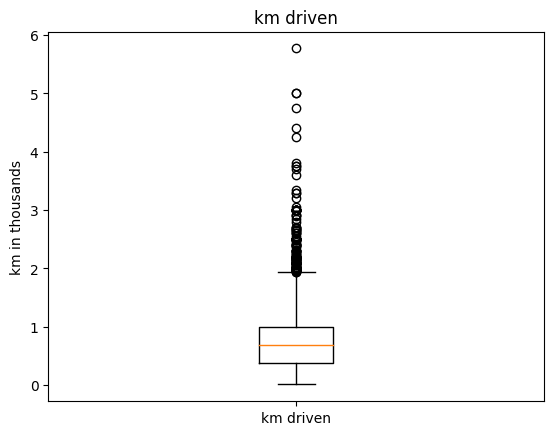

In [69]:
# Verifyinh changes
plt.boxplot(x=carsData['km_driven'].values,labels=['km driven'])
plt.title("km driven")
plt.ylabel("km in thousands")
plt.show()

#### Engine capacity

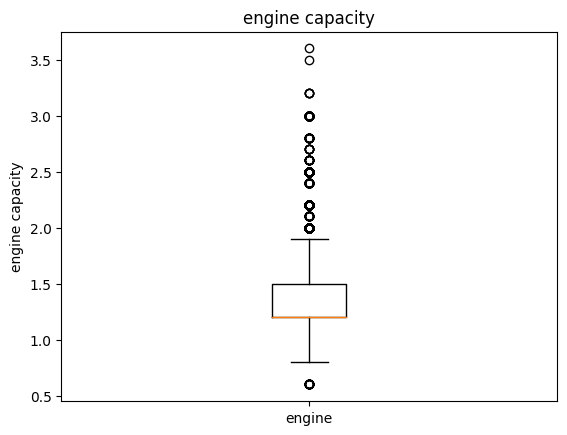

In [70]:
plt.boxplot(x=carsData['engine'].values,labels=['engine'])
plt.title("engine capacity")
plt.ylabel("engine capacity")
plt.show()

**Observation**
* 95% of the cars have engine size less than 2500 CC.
* 50% of the cars have engine size between 1000 to 2000 CC.
* Potential outliers observed.
* larger engine size are ususlly with sports car and hence can affect selling price.

#### Engine power

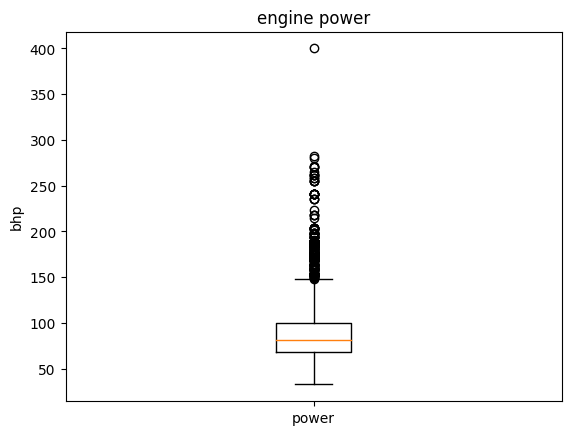

In [71]:
plt.boxplot(x=carsData['max_power'].values,labels=['power'])
plt.title("engine power")
plt.ylabel("bhp")
plt.show()

In [72]:
# Analyzing outlier
carsData[carsData['max_power']>300]

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,make,model,age
170,100.0,0.3,Petrol,Individual,Automatic,First Owner,42.0,2.0,400.0,4,Volvo,XC90,6


**Observation**
* 95% of the cars have less than 150 bhp.
* potential outliers observed.
* As BHP increases car goes into sports car category and selling price depreciates at a higher rate compared to lower bhp cars.

#### Age

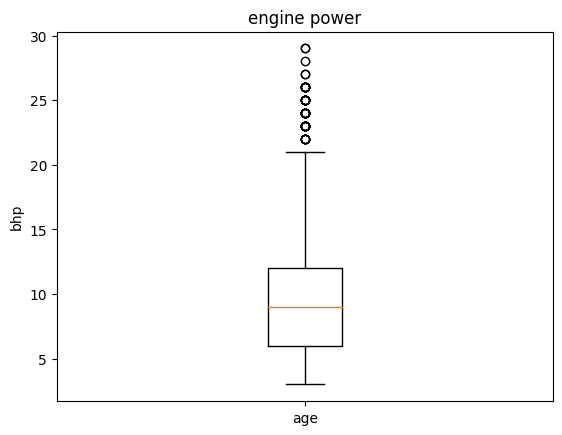

In [73]:
plt.boxplot(x=carsData['age'].values,labels=['age'])
plt.title("engine power")
plt.ylabel("bhp")
plt.show()

**Observation**
* Potential outliers observed.
* 95% of the cars are below 20 years of age.
* Age inverse proportional to selling price. 

### Bivariant Analysis
analyzing all the univariant with respect to selling price(dependent feature)

#### Make vs Selling price

[]

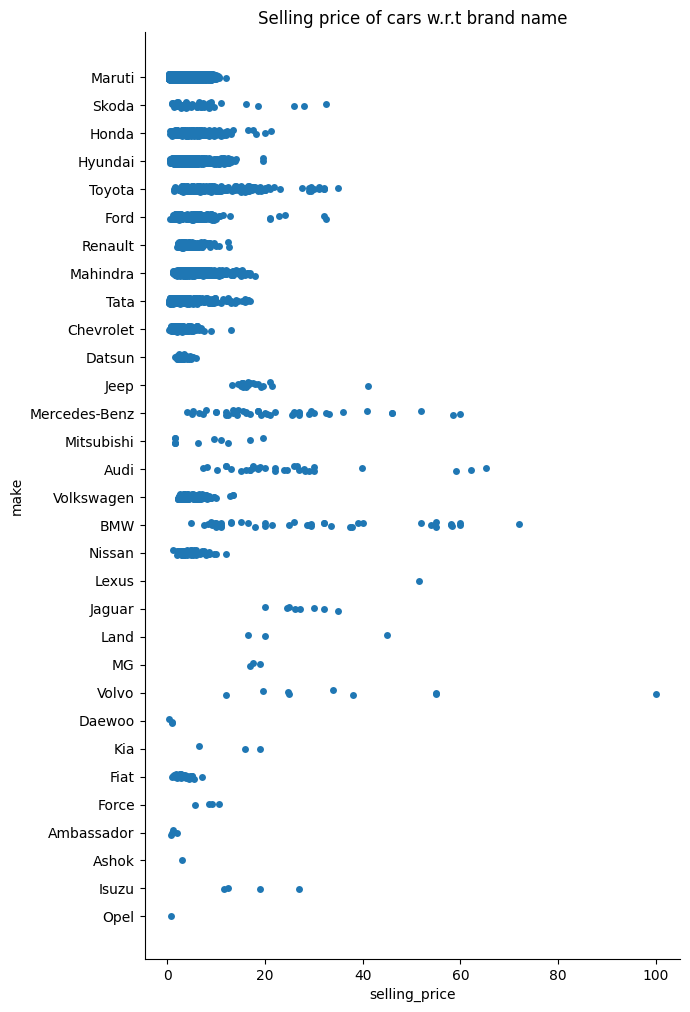

In [74]:
sns.catplot(data=carsData, y="make", x="selling_price",height=10, aspect=0.7)
plt.title("Selling price of cars w.r.t brand name")
plt.plot()

**Observation**
* Majority of the cars brands having large used car market share have selling price less than 20 lakhs.

#### Fuel vs Selling price

[]

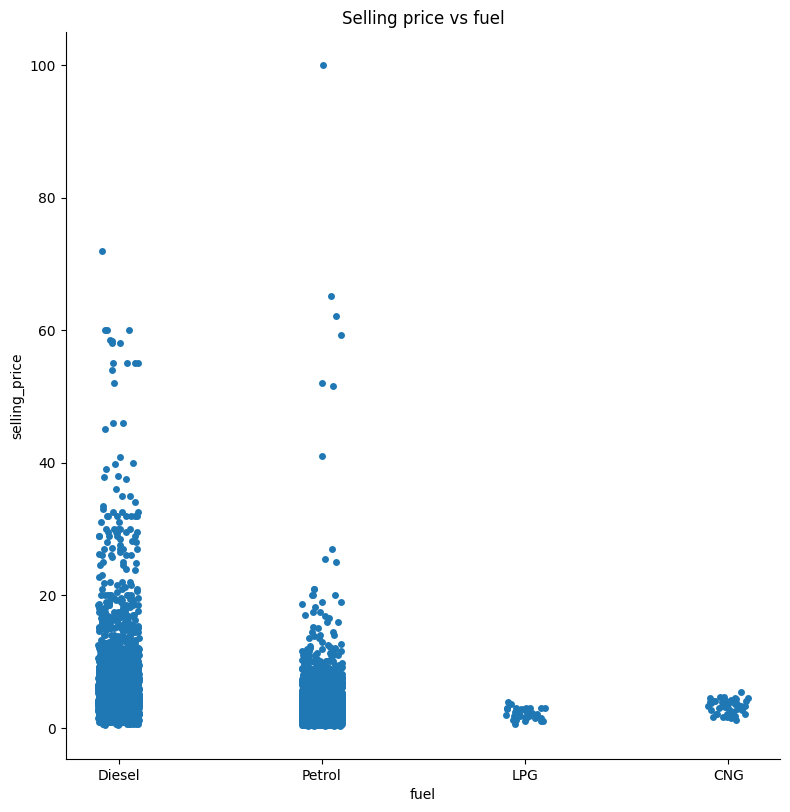

In [75]:
sns.catplot(data=carsData, x="fuel", y="selling_price",height=8, aspect=1)
plt.title("Selling price vs fuel")
plt.plot()

**Observation**
* LPG and CNG fule type with aroud 1% of cars in the data set have selling price around 10 lakhs.
* Outliers with few highest selling price more than 50 lakh observed in petrol and diesel. 

#### Seller type vs Selling price

[]

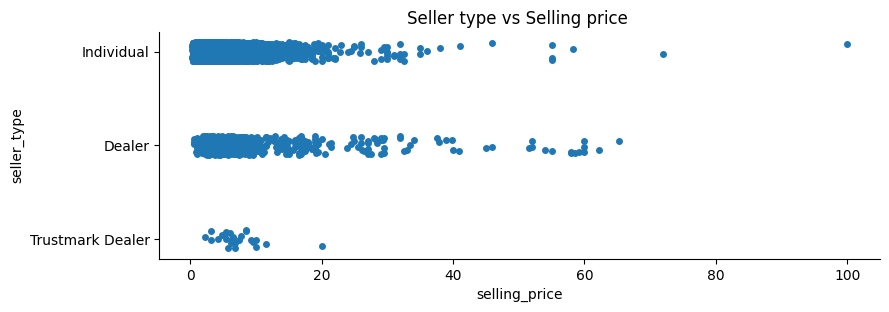

In [76]:
sns.catplot(data=carsData, y="seller_type", x="selling_price",height=3, aspect=3)
plt.title("Seller type vs Selling price ")
plt.plot()

**Observation**
* Majority of the cars brands having large used car market share have selling price less than 20 lakhs.

#### Transmission vs Selling price

[]

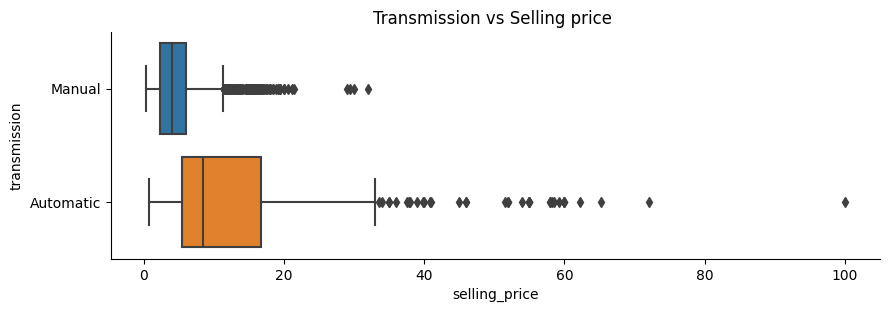

In [77]:
sns.catplot(data=carsData, y="transmission", x="selling_price",height=3, aspect=3, kind="box")
plt.title("Transmission vs Selling price ")
plt.plot()

**Observation**
* Median selling price of autimatic is at 10 lakh
* 95% of manual transmission is below 10 lakh.

#### Owner vs Selling price

[]

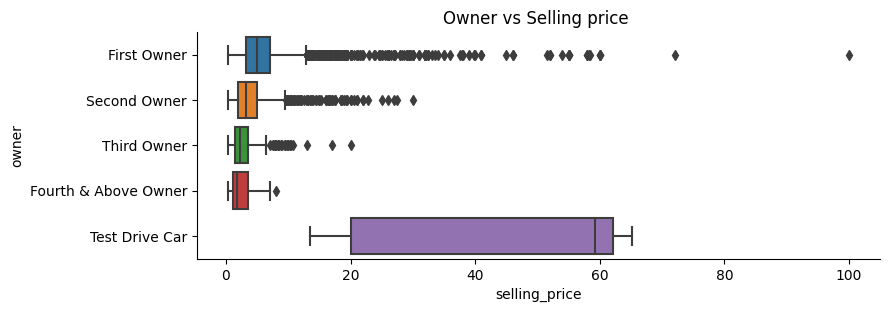

In [78]:
sns.catplot(data=carsData, y="owner", x="selling_price",height=3, aspect=3, kind="box")
plt.title("Owner vs Selling price ")
plt.plot()

**Observation**
* Majority of the outliers are noted for first and second owner.

#### Seats vs Selling price

[]

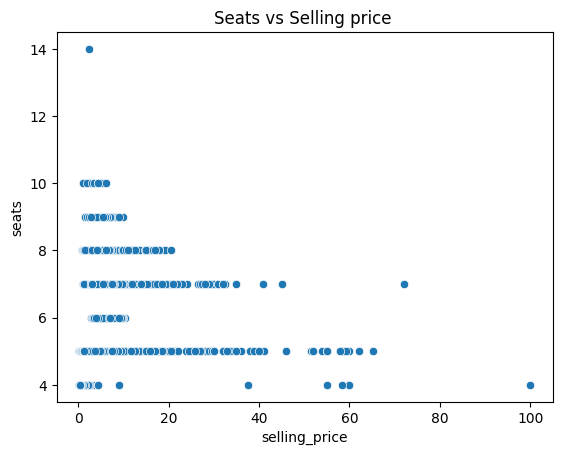

In [79]:
sns.scatterplot(data=carsData, y="seats", x="selling_price")
plt.title("Seats vs Selling price ")
plt.plot()

**Observation**
* 5 and 7 seater cars are present in all selling price.
* 14 and 2 seater is an outlier

#### Model vs Selling price

[]

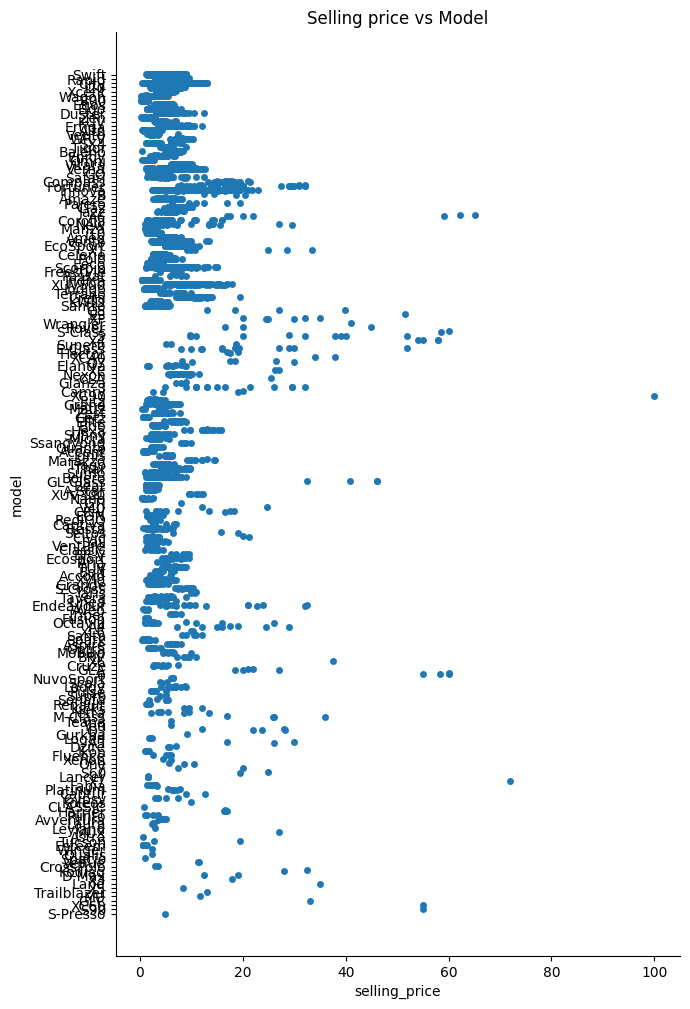

In [80]:
sns.catplot(data=carsData, y="model", x="selling_price",height=10, aspect=0.7)
plt.title("Selling price vs Model")
plt.plot()

**Observation**
* Majority of the cars models are less than 20 lakhs.

#### Milege vs Selling price

[]

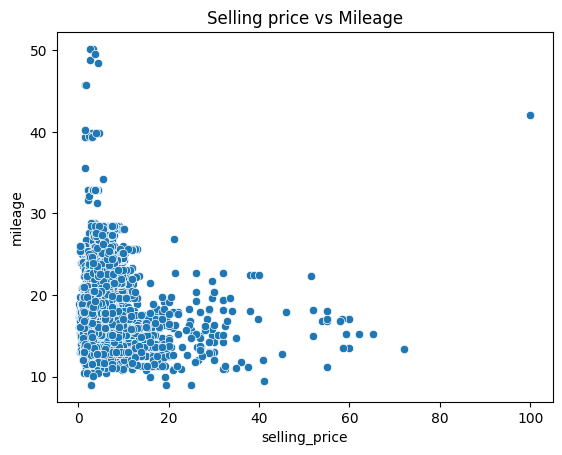

In [81]:
sns.scatterplot(data=carsData, y="mileage", x="selling_price")
plt.title("Selling price vs Mileage")
plt.plot()

**Observation**
* Higher mileage for cars below 15 lakhs.
* low mileage with high selling price.

#### KM driven vs Selling price

[]

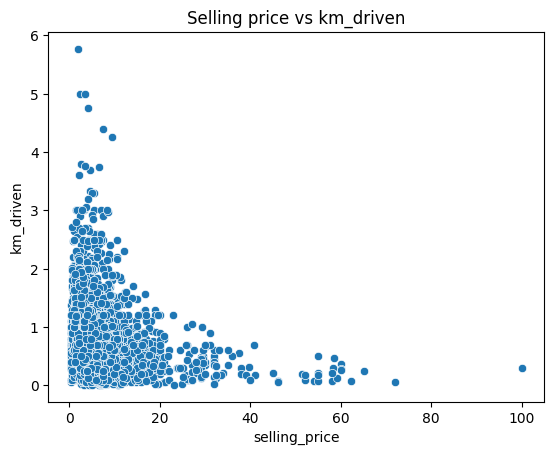

In [82]:
sns.scatterplot(data=carsData, y="km_driven", x="selling_price")
plt.title("Selling price vs km_driven")
plt.plot()

**Observation**
* Cars with less km driven have high selling price.

#### Engine capacity vs Selling price

[]

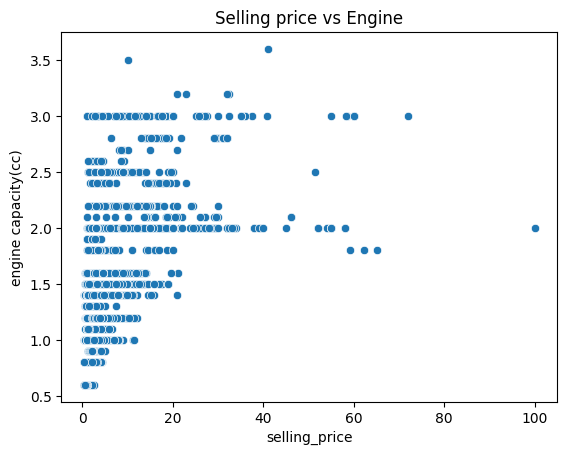

In [83]:
sns.scatterplot(data=carsData, y="engine", x="selling_price")
plt.title("Selling price vs Engine")
plt.ylabel('engine capacity(cc)')
plt.plot()

**Observation**
* cars with higher engine capacity tend to have high selling price.

#### Engine power vs Selling price

[]

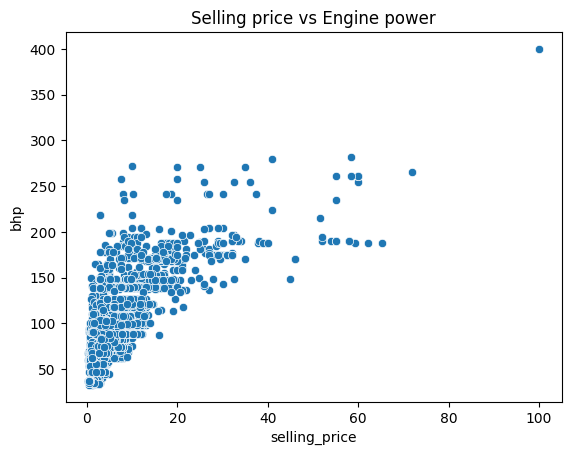

In [84]:
sns.scatterplot(data=carsData, y="max_power", x="selling_price")
plt.title("Selling price vs Engine power")
plt.ylabel("bhp")
plt.plot()

**Observation**
* Similar observation noted in Engine capacity.
* Usually higher capacity engine tend to have high power.

#### Age vs Selling price

[]

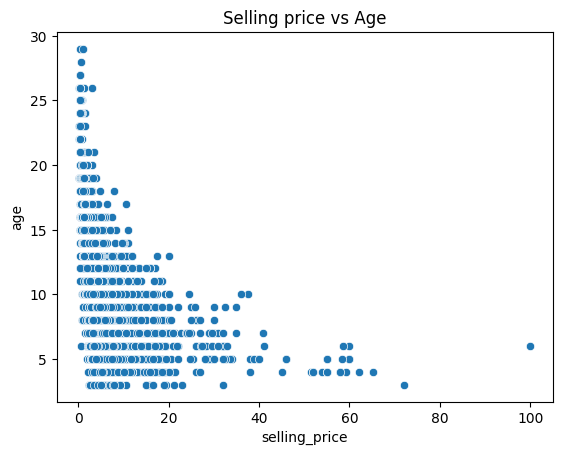

In [85]:
sns.scatterplot(data=carsData, y="age", x="selling_price")
plt.title("Selling price vs Age")
plt.plot()

**Observation**
* Cars tend to have higher selling price with lower age.

#### Correlation Test(numeric features)

Using Spearman corelation because:
* we have pairs of continuous variables and the relationships between them don’t follow a straight line but they follow a monotonic relationship.
* Outliers are observed in most of the features.

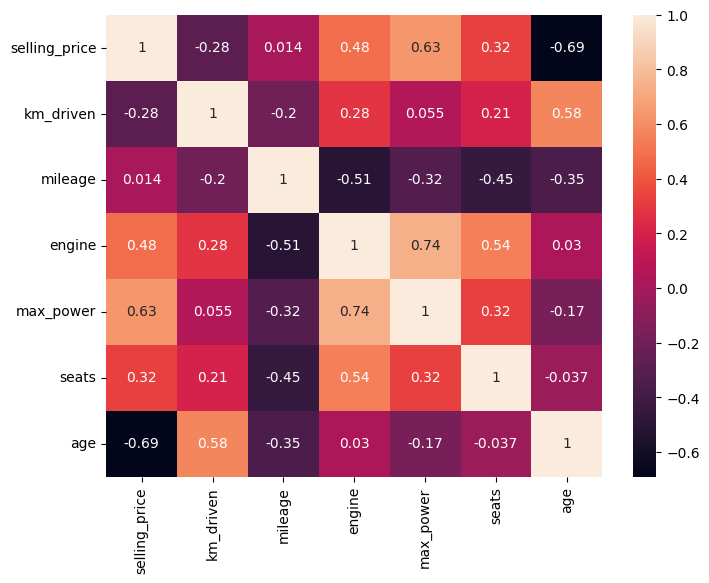

In [88]:
plt.figure(figsize=(8,6))
sns.heatmap(carsData[['selling_price','km_driven','mileage','engine','max_power','seats','age']].corr(method='spearman'), annot=True)
plt.show()

**Observation**
* Age and km driven are negatively corelated with selling price.
* Engine power, Engine capacity and Year are positively corelated with selling price.
* Mileage and seats have no proper relation.
* Age & Year, engine capacity & power are multicolinear and any one feature should be removed before using features for linear regression.

### Multivariant analysis

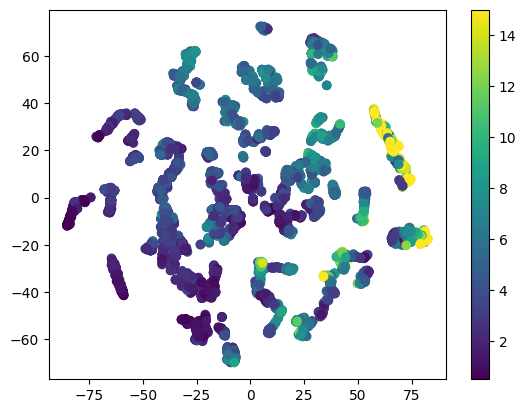

In [89]:
# From basic statistical analysis 75% of the selling price is around 6.5 lakhs but max value is 100 lakhs 
# Hence color limit(clim)= 15
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(carsData[['km_driven','mileage', 'engine', 'max_power', 'seats', 'age']])
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=carsData['selling_price'])
plt.colorbar()
plt.clim(0.5, 15)
plt.show()

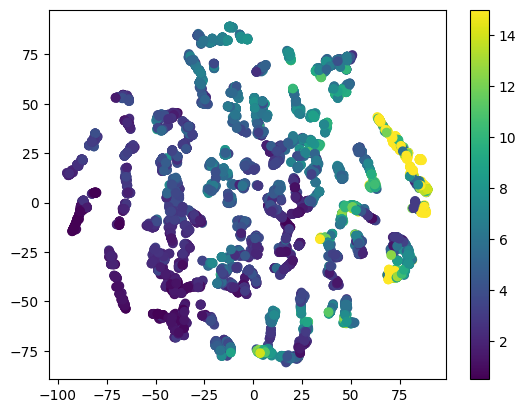

In [90]:
xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(carsData[['km_driven','mileage', 'engine', 'max_power', 'seats', 'age']])
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=carsData['selling_price'])
plt.colorbar()
plt.clim(0.5, 15)
plt.show()

**Observation**
* Color bar indicates in lakhs.
* Cars price more then 14 laks have a seperate cluster.
* Darker clusters are of car price less than 4 lakhs.

## Feature Engineerig (Advanced)

### Make and Model

In [91]:
# Viewing data
carsData.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,make,model,age
0,4.5,1.46,Diesel,Individual,Manual,First Owner,23.40,1.2,74.00,5,Maruti,Swift,9
1,3.7,1.20,Diesel,Individual,Manual,Second Owner,21.14,1.5,103.52,5,Skoda,Rapid,9
2,1.6,1.40,Petrol,Individual,Manual,Third Owner,17.70,1.5,78.00,5,Honda,City,17
3,2.2,1.27,Diesel,Individual,Manual,First Owner,23.00,1.4,90.00,5,Hyundai,i20,13
4,1.3,1.20,Petrol,Individual,Manual,First Owner,16.10,1.3,88.20,5,Maruti,Swift,16


In [92]:
# Count of unique categories in each feature and encoding them
carsData['make'].value_counts().index.unique()

Index(['Maruti', 'Hyundai', 'Mahindra', 'Tata', 'Honda', 'Ford', 'Toyota',
       'Chevrolet', 'Renault', 'Volkswagen', 'Nissan', 'Skoda', 'Datsun',
       'Mercedes-Benz', 'BMW', 'Fiat', 'Audi', 'Jeep', 'Mitsubishi', 'Volvo',
       'Jaguar', 'Isuzu', 'Ambassador', 'Force', 'Land', 'Kia', 'Daewoo', 'MG',
       'Ashok', 'Lexus', 'Opel'],
      dtype='object')

In [93]:
# Cras are knonw to be different by their country.
# Such as Japan: reliability, German: design etc..
# Hence Creating dictonary of model:county pair.
# Data from wikipedia

modelCountry = {
    'Maruti': "Japan",
    'Hyundai': "South Korea",
    'Mahindra': "India",
    'Tata': "India",
    'Honda': "Japan",
    'Ford': "United States",
    'Toyota': " Japan",
    'Chevrolet': "United States",
    'Renault': "France",
    'Volkswagen': "Germany",
    'Nissan': "Japan",
    'Skoda':"Germany",
    'Datsun':"Japan",
    'Mercedes-Benz':"Germany",
    'BMW':"Germany",
    'Fiat':"Italy",
    'Audi': "Germany",
    'Jeep': "United States",
    'Mitsubishi':"Japan",
    'Volvo': "Sweden",
    'Jaguar': "United Kingdom", 
    'Isuzu':"Japan", 
    'Ambassador':"India", 
    'Force':"India", 
    'Land': "United Kingdom", 
    'Kia':"South Korea", 
    'Daewoo':"South Korea", 
    'MG':"United Kingdom", 
    'Ashok':"India", 
    'Lexus':"Japan", 
    'Opel':"Germany"
}

modelCountryArr = list(modelCountry.values())
print("Total number of car brands:",len(np.unique(modelCountryArr)))

Total number of car brands: 10


**Observation**
* Still many car brands to encode.
* Hence we will categorize cars based on Best Resale[Yes/No] or [1,0]

In [94]:
# create new best_resale feature.
# As of 2023 best resale brands are: Toyota,Maruti,Hyundai,Kia,Honda,Mahindra,Tata
bestResaleBrands = ['Toyota','Maruti','Hyundai','Kia','Honda','Mahindra','Tata']

bestResale = [] # New list to capture 
for carBrand in carsData['make']:
  if carBrand in bestResaleBrands:
    bestResale.append(1)
  else:
    bestResale.append(0)

carsData['best_resale'] = bestResale

carsData.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,make,model,age,best_resale
0,4.5,1.46,Diesel,Individual,Manual,First Owner,23.40,1.2,74.00,5,Maruti,Swift,9,1
1,3.7,1.20,Diesel,Individual,Manual,Second Owner,21.14,1.5,103.52,5,Skoda,Rapid,9,0
2,1.6,1.40,Petrol,Individual,Manual,Third Owner,17.70,1.5,78.00,5,Honda,City,17,1
3,2.2,1.27,Diesel,Individual,Manual,First Owner,23.00,1.4,90.00,5,Hyundai,i20,13,1
4,1.3,1.20,Petrol,Individual,Manual,First Owner,16.10,1.3,88.20,5,Maruti,Swift,16,1


In [95]:
# Drop parent feature
carsData.drop(['make','model'], axis = 1, inplace=True)

### Fuel
* Fuel has 4 unique categores petrol,diesel,cng,lpg.
* CNG and LPG are alternate fuels and intended to offer simialr benifits  hence combiing them as CleanFuel.
* Both of them are in the same selling price range.

In [96]:
carsData.loc[(carsData['fuel'] =="CNG") | (carsData['fuel']=="LPG"),'fuel'] = 'CleanFuel'

### Seats
* Its anumerical feature but should be considered as categorical.
* creating seats categories as <=5, 6 to 8 , 9<

In [97]:
# assigning values for seats 5 and less than 5
carsData.loc[carsData['seats'] <=5,'seats'] = 'lessOrEq5'

# Using '==' coz post above operation datatype would be string
# assigning values for seats 6 to 8
carsData.loc[(carsData['seats'] == 6) | (carsData['seats'] == 7) | (carsData['seats'] == 8),'seats'] = 'btwn6To8'

# assigning values for seats 9 and greater than 9
carsData.loc[(carsData['seats'] == 9) | (carsData['seats'] == 10) | (carsData['seats'] == 14),'seats'] = 'aboveOrEq9'

## Encoding categorical variables
* Dummy variable encoding

In [98]:
finalData = pd.get_dummies(carsData, drop_first=True) # True: to overcome dummi variable trap
finalData.head()

,selling_price,km_driven,mileage,engine,max_power,age,best_resale,fuel_Diesel,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seats_btwn6To8,seats_lessOrEq5
0,4.5,1.46,23.40,1.2,74.00,9,1,1,0,1,0,1,0,0,0,0,0,1
1,3.7,1.20,21.14,1.5,103.52,9,0,1,0,1,0,1,0,1,0,0,0,1
2,1.6,1.40,17.70,1.5,78.00,17,1,0,1,1,0,1,0,0,0,1,0,1
3,2.2,1.27,23.00,1.4,90.00,13,1,1,0,1,0,1,0,0,0,0,0,1
4,1.3,1.20,16.10,1.3,88.20,16,1,0,1,1,0,1,0,0,0,0,0,1


# Modelling

Train test split

In [99]:
finalData.corr(method='spearman')

,selling_price,km_driven,mileage,engine,max_power,age,best_resale,fuel_Diesel,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seats_btwn6To8,seats_lessOrEq5
selling_price,1.000000,-0.282956,0.014078,0.478798,0.634021,-0.690890,-0.034640,0.358568,-0.340421,-0.220532,0.050629,-0.308629,-0.145535,-0.231688,0.046266,-0.207628,0.299714,-0.295434
km_driven,-0.282956,1.000000,-0.204290,0.284527,0.054837,0.575005,0.018522,0.373872,-0.377184,0.161031,-0.054773,0.158150,0.111293,0.248865,-0.040662,0.188686,0.175636,-0.197818
mileage,0.014078,-0.204290,1.000000,-0.508599,-0.323351,-0.350114,0.020175,0.071214,-0.107316,-0.000819,-0.012845,0.166172,-0.079613,-0.101293,-0.020910,-0.099682,-0.447270,0.481332
engine,0.478798,0.284527,-0.508599,1.000000,0.740010,0.030136,-0.134979,0.584476,-0.561571,-0.093256,0.002656,-0.191502,-0.009499,0.031650,0.028368,0.007347,0.478708,-0.517998
max_power,0.634021,0.054837,-0.323351,0.740010,1.000000,-0.172567,-0.103218,0.363615,-0.333815,-0.169989,0.031927,-0.290177,-0.024643,-0.044774,0.041821,-0.041540,0.311399,-0.291375
age,-0.690890,0.575005,-0.350114,0.030136,-0.172567,1.000000,0.030819,0.001004,-0.004373,0.151286,-0.050430,0.161004,0.178188,0.313354,-0.044195,0.259485,-0.019890,0.009605
best_resale,-0.034640,0.018522,0.020175,-0.134979,-0.103218,0.030819,1.000000,-0.105957,0.094518,0.108158,0.014997,0.153303,0.019639,0.004862,-0.040122,0.012403,0.144203,-0.137683
fuel_Diesel,0.358568,0.373872,0.071214,0.584476,0.363615,0.001004,-0.105957,1.000000,-0.974328,-0.021488,-0.055500,0.018678,-0.008964,0.044757,-0.018960,-0.008890,0.342713,-0.365207
fuel_Petrol,-0.340421,-0.377184,-0.107316,-0.561571,-0.333815,-0.004373,0.094518,-0.974328,1.000000,0.013732,0.057299,-0.026674,0.008976,-0.046728,0.019720,0.008156,-0.332059,0.354026
seller_type_Individual,-0.220532,0.161031,-0.000819,-0.093256,-0.169989,0.151286,0.108158,-0.021488,0.013732,1.000000,-0.187404,0.212751,0.052353,0.117906,-0.080513,0.088367,0.026739,-0.036619


In [100]:
finalData.drop(['selling_price'], axis=1)

,km_driven,mileage,engine,max_power,age,best_resale,fuel_Diesel,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seats_btwn6To8,seats_lessOrEq5
0,1.46,23.40,1.2,74.00,9,1,1,0,1,0,1,0,0,0,0,0,1
1,1.20,21.14,1.5,103.52,9,0,1,0,1,0,1,0,1,0,0,0,1
2,1.40,17.70,1.5,78.00,17,1,0,1,1,0,1,0,0,0,1,0,1
3,1.27,23.00,1.4,90.00,13,1,1,0,1,0,1,0,0,0,0,0,1
4,1.20,16.10,1.3,88.20,16,1,0,1,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,0.50,18.90,1.0,67.10,10,1,0,1,1,0,1,0,1,0,0,0,1
8122,0.80,22.54,1.4,88.73,9,1,1,0,1,0,1,0,1,0,0,0,1
8123,1.10,18.50,1.2,82.85,10,1,0,1,1,0,1,0,0,0,0,0,1
8124,1.19,16.80,1.5,110.00,16,1,1,0,1,0,1,1,0,0,0,0,1


In [101]:
# Independent and dependent features

x = finalData.drop(['selling_price'], axis=1)
y = finalData['selling_price']

In [102]:
finalData.shape

(6685, 18)

In [103]:
x.shape

(6685, 17)

In [104]:
x

,km_driven,mileage,engine,max_power,age,best_resale,fuel_Diesel,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seats_btwn6To8,seats_lessOrEq5
0,1.46,23.40,1.2,74.00,9,1,1,0,1,0,1,0,0,0,0,0,1
1,1.20,21.14,1.5,103.52,9,0,1,0,1,0,1,0,1,0,0,0,1
2,1.40,17.70,1.5,78.00,17,1,0,1,1,0,1,0,0,0,1,0,1
3,1.27,23.00,1.4,90.00,13,1,1,0,1,0,1,0,0,0,0,0,1
4,1.20,16.10,1.3,88.20,16,1,0,1,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,0.50,18.90,1.0,67.10,10,1,0,1,1,0,1,0,1,0,0,0,1
8122,0.80,22.54,1.4,88.73,9,1,1,0,1,0,1,0,1,0,0,0,1
8123,1.10,18.50,1.2,82.85,10,1,0,1,1,0,1,0,0,0,0,0,1
8124,1.19,16.80,1.5,110.00,16,1,1,0,1,0,1,1,0,0,0,0,1


In [105]:
# Finding important feature using extra tree
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [106]:
print(model.feature_importances_)

[4.58593158e-02 3.60156168e-02 7.12427206e-02 3.01851379e-01
 2.29611531e-01 6.13297323e-02 2.48248990e-02 5.62149208e-03
 6.43275257e-03 7.46020762e-05 1.72545006e-01 5.78791081e-04
 1.04309119e-02 1.21042009e-02 1.53873481e-03 1.07332347e-02
 9.20507897e-03]


In [107]:
import matplotlib.pyplot as plt

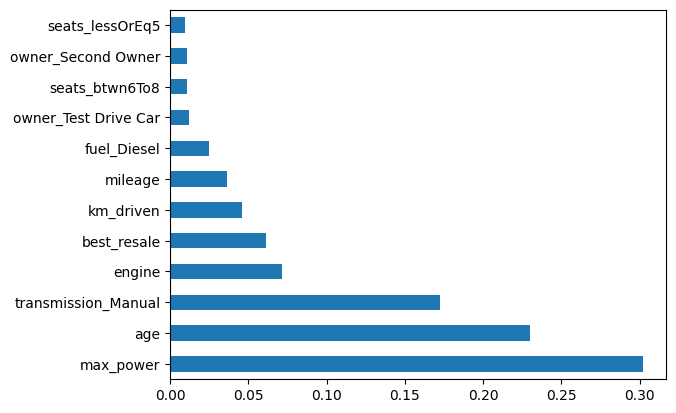

In [108]:
#plot graph of feature importances for better visualization 
feat_importances = pd.Series(model.feature_importances_, index=x.columns) 
feat_importances.nlargest(12).plot(kind='barh') 
plt.show()

In [109]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=35)

x_train.shape

(5348, 17)

In [110]:
# Not scaling since using tree based models

In [111]:
from sklearn.ensemble import RandomForestRegressor
regress_model = RandomForestRegressor()

In [112]:
# Randomized search CV
import numpy as np

# Number of trees in random forest 
n_estim = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_feat = ['auto','sqrt']
max_dept = [int(x) for x in np.linspace(start=5, stop=30, num=6)]
min_sample_split = [2,5,10,15,100]
min_sample_leaf = [1,2,5,10]

In [113]:
from sklearn.model_selection import RandomizedSearchCV

In [114]:
from scipy import rand
# creating random grind

random_grid = {'n_estimators':n_estim,
               'max_features':max_feat,
               'max_depth':max_dept,
               'min_samples_split':min_sample_split,
               'min_samples_leaf':min_sample_leaf}
print(random_grid)               

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [115]:
# Creating a base model to run random grind
rf = RandomForestRegressor()

In [116]:
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,
                               scoring='neg_mean_squared_error', n_iter=10,
                               cv=5, verbose=2, n_jobs=1)

In [117]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  11.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  11.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  12.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   9.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   8.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=700; total time=   3.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=700; total time=   7.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estima

C:\Users\91812\.conda\envs\carpricecalc\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   1.3s


C:\Users\91812\.conda\envs\carpricecalc\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   1.1s


C:\Users\91812\.conda\envs\carpricecalc\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   1.2s


C:\Users\91812\.conda\envs\carpricecalc\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   1.1s


C:\Users\91812\.conda\envs\carpricecalc\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   1.2s


C:\Users\91812\.conda\envs\carpricecalc\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   1.1s


C:\Users\91812\.conda\envs\carpricecalc\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   1.3s


C:\Users\91812\.conda\envs\carpricecalc\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   1.3s


C:\Users\91812\.conda\envs\carpricecalc\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   3.0s


C:\Users\91812\.conda\envs\carpricecalc\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   1.6s


C:\Users\91812\.conda\envs\carpricecalc\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   8.9s


C:\Users\91812\.conda\envs\carpricecalc\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   9.5s


C:\Users\91812\.conda\envs\carpricecalc\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   8.2s


C:\Users\91812\.conda\envs\carpricecalc\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   9.6s


C:\Users\91812\.conda\envs\carpricecalc\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=  15.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   8.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   8.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   7.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   5.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   4.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   9.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=  12.1s
[CV] END max_depth=15, max_feature

C:\Users\91812\.conda\envs\carpricecalc\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=  16.5s


C:\Users\91812\.conda\envs\carpricecalc\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=  15.9s


C:\Users\91812\.conda\envs\carpricecalc\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=  15.7s


C:\Users\91812\.conda\envs\carpricecalc\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=  15.8s


C:\Users\91812\.conda\envs\carpricecalc\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=  15.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   3.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   3.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   3.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   3.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   3.4s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [118]:
prediction = rf_random.predict(x_test)

In [119]:
prediction

array([2.92647375, 1.2945194 , 5.41256305, ..., 6.68964917, 1.09566467,
       8.55383975])

C:\Users\91812\AppData\Local\Temp\ipykernel_13064\1520944062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: xlabel='selling_price', ylabel='Density'>

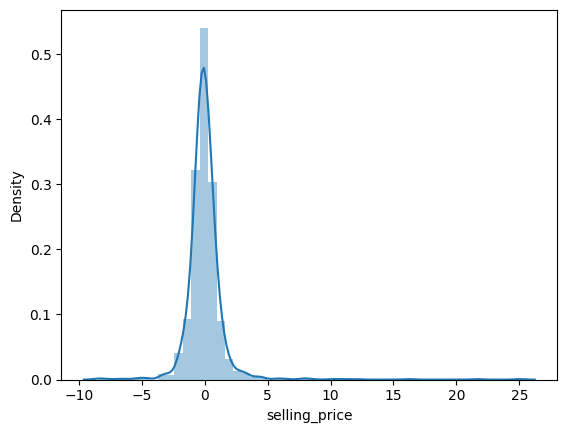

In [120]:
sns.distplot(y_test-prediction)

**Observation**
* Even though most of our predicted values are close to zero.
* Ther variance is large.

In [121]:
y_test

1462    2.5
5676    1.0
1683    6.8
793     8.1
1484    1.2
       ... 
1806    0.6
225     2.4
1740    6.5
7729    1.6
143     8.0
Name: selling_price, Length: 1337, dtype: float64

In [122]:
prediction

array([2.92647375, 1.2945194 , 5.41256305, ..., 6.68964917, 1.09566467,
       8.55383975])

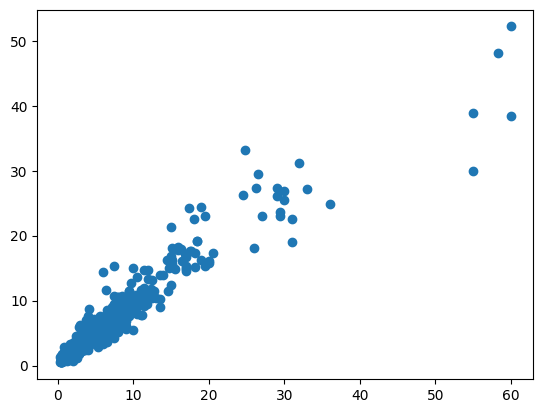

In [123]:
plt.scatter(y_test,prediction)

**Observation**
* preicted car value less than 20lakhs is more reliable.
* For higher values there is more variance.
* Possible due to ledd data points in the high value cars.

In [124]:
from sklearn.metrics import mean_squared_error
# calculate errors
errors_MSE = mean_squared_error(y_test,prediction)
# report error
print(errors_MSE)

2.730304056108708


In [125]:
errors_RMSE = mean_squared_error(y_test,prediction, squared=False)
# report error
print(errors_RMSE)

1.6523631731882396


In [126]:
# example of calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
mae_errors = mean_absolute_error(y_test,prediction)
# report error
print(mae_errors)

0.8171704715212822


In [127]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,prediction)
print(r2)

0.9038432385678129


Storing model for deployment

In [ ]:


# Dump info to that file
#pickle.dump(rf_random,file)

#import sys
#print(sys.modules.keys())

#!pip freeze > requirements.txt
#pip list --format=freeze > requirements.txt

#! pip list --format=freeze > requirements.txt

In [128]:
import pickle
# Open file where you want to store
file= open('basic_randForest_carPredModel.pkl','wb') 

# Dump info to that file
pickle.dump(rf_random,file)